In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

In [2]:
import os
import zipfile

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tqdm import tqdm 
from tensorflow.keras.utils import to_categorical


In [4]:
base_dir='/Users/Ritik/Desktop/Machine Learning/Jolly season/dataset'

In [5]:
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

In [6]:
train_fnames=os.listdir(train_dir)
test_fnames=os.listdir(test_dir)

print('Names in train directory: ',train_fnames[:5])
print('Names in test directory: ',test_fnames[:5])

Names in train directory:  ['.ipynb_checkpoints', 'image1.jpg', 'image1000.jpg', 'image1001.jpg', 'image1002.jpg']
Names in test directory:  ['image10.jpg', 'image100.jpg', 'image1013.jpg', 'image1014.jpg', 'image1018.jpg']


In [7]:
train_new=pd.read_csv('train_new.csv')
test_new=pd.read_csv('test_new.csv')

In [8]:
train_new.head()

,Image,Class
0,image3476,Miscellaneous
1,image5198,Candle
2,image4183,Snowman
3,image1806,Miscellaneous
4,image7831,Miscellaneous


In [9]:
test_new.head()

,Image
0,image10
1,image100
2,image1013
3,image1014
4,image1018


In [10]:
train_image=[]
for i in tqdm(range(train_new.shape[0])):
    #img=image.load_img('/Users/Ritik/Desktop/Machine Learning/Jolly season/dataset/train'+train['Image'][i].astype('str')+'.jpg',target_size=(28,28,1),color_mode="grayscale")
    img=image.load_img('/Users/Ritik/Desktop/Machine Learning/Jolly season/dataset/train/'+str(train_new['Image'][i])+'.jpg',target_size=(28,28,1),color_mode="grayscale")
    img=image.img_to_array(img)
    img=img/255
    train_image.append(img)
X=np.array(train_image)   
print(X.shape)

100%|████████████████████████████████████████████████████████████████████████████| 6469/6469 [00:04<00:00, 1564.52it/s]

(6469, 28, 28, 1)


In [11]:
test_image=[]
for i in tqdm(range(test_new.shape[0])):
    imaeg=image.load_img('/Users/Ritik/Desktop/Machine Learning/Jolly season/dataset/test/'+str(test_new['Image'][i])+'.jpg',target_size=(28,28,1),color_mode=("grayscale"))
    imaeg=image.img_to_array(imaeg)
    imaeg=imaeg/255
    test_image.append(imaeg)
test_img=np.array(test_image) 
print(test_img.shape)

100%|████████████████████████████████████████████████████████████████████████████| 3489/3489 [00:02<00:00, 1476.25it/s]

(3489, 28, 28, 1)


In [12]:
# label_list = train_new['Class'].tolist()
# label_numeric = {k: v+1 for v, k in enumerate(set(label_list))}
# y = [label_numeric[k] for k in label_list]
# y = np.array(y)


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_new['Class']=le.fit_transform(train_new['Class'])

y = train_new['Class']
print(y.shape)
y = to_categorical(y)
print(y.shape)
print(y[0])


(6469,)
(6469, 6)
[0. 0. 0. 0. 1. 0.]


In [13]:
# z=pd.DataFrame(y)
# z.head(15)
# #Miscellaneous=4
# #Candle=1
# #Snowman=5
# #Airplane=0
# #Christmas_Tree=2
# #Jacket=3


In [64]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [65]:
#adam=tf.keras.optimizers.Adam(lr=0.001)
rms=tf.keras.optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=rms, loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5175, 28, 28, 1), (5175, 6), (1294, 28, 28, 1), (1294, 6))

In [67]:
lr = keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,cooldown=2,min_lr=0.00005,verbose=1)

In [ ]:
history=model.fit(X_train, y_train, 
                  batch_size=256,shuffle=True,
                  epochs=50,verbose=1,
                  validation_data=(X_test,y_test),callbacks=[lr])


Epoch 1/50
21/21 [==============================] - 11s 501ms/step - loss: 1.5063 - accuracy: 0.4272 - val_loss: 1.4702 - val_accuracy: 0.4444
Epoch 2/50
21/21 [==============================] - 11s 503ms/step - loss: 1.4045 - accuracy: 0.4812 - val_loss: 1.4036 - val_accuracy: 0.4691
Epoch 3/50
21/21 [==============================] - 10s 498ms/step - loss: 1.3474 - accuracy: 0.4989 - val_loss: 1.3534 - val_accuracy: 0.4923
Epoch 4/50
21/21 [==============================] - 10s 496ms/step - loss: 1.3204 - accuracy: 0.5028 - val_loss: 1.3009 - val_accuracy: 0.5070
Epoch 5/50
21/21 [==============================] - 10s 492ms/step - loss: 1.2835 - accuracy: 0.5177 - val_loss: 1.3149 - val_accuracy: 0.4969
Epoch 6/50
21/21 [==============================] - 10s 489ms/step - loss: 1.2624 - accuracy: 0.5268 - val_loss: 1.2588 - val_accuracy: 0.5278
Epoch 7/50
21/21 [==============================] - 10s 490ms/step - loss: 1.2487 - accuracy: 0.5351 - val_loss: 1.2564 - val_accuracy: 0.5332

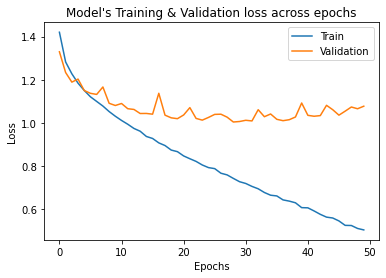

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

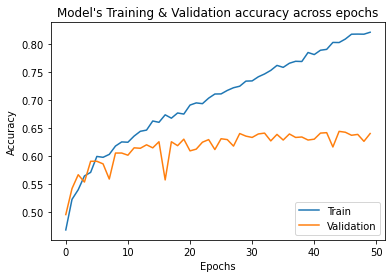

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [53]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 2s 50ms/step - loss: 1.0777 - accuracy: 0.6399


[1.0776631832122803, 0.6398763656616211]

In [54]:
# making predictions
y_pred =model.predict(test_img)

In [55]:
prediction = [np.argmax(element) for element in y_pred]
prediction[:5]

[4, 4, 4, 4, 4]

In [56]:
pred=pd.DataFrame()

In [57]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [58]:
testid=test['Image'].copy()

In [59]:
pred=pd.DataFrame({'Image':testid,'Class':prediction})

In [60]:
pred.head(10)

,Image,Class
0,image10.jpg,4
1,image100.jpg,4
2,image1013.jpg,4
3,image1014.jpg,4
4,image1018.jpg,4
5,image1019.jpg,3
6,image1021.jpg,3
7,image1023.jpg,4
8,image1024.jpg,4
9,image1029.jpg,4


In [61]:
pred['Class']=le.inverse_transform(pred['Class'])

In [62]:
pred.Class.value_counts()

Miscellaneous     1611
Christmas_Tree    1038
Jacket             350
Candle             220
Airplane           143
Snowman            127
Name: Class, dtype: int64

In [63]:
pred.to_csv('JS_simple NN.csv',index=False)